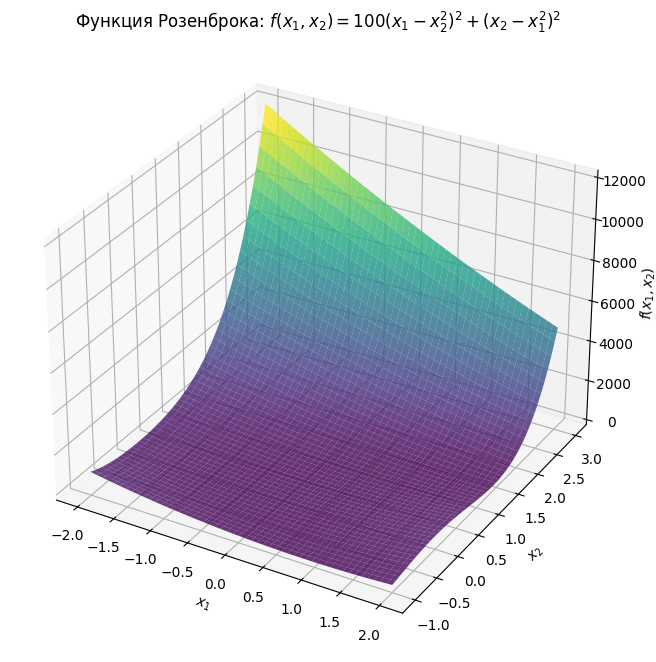

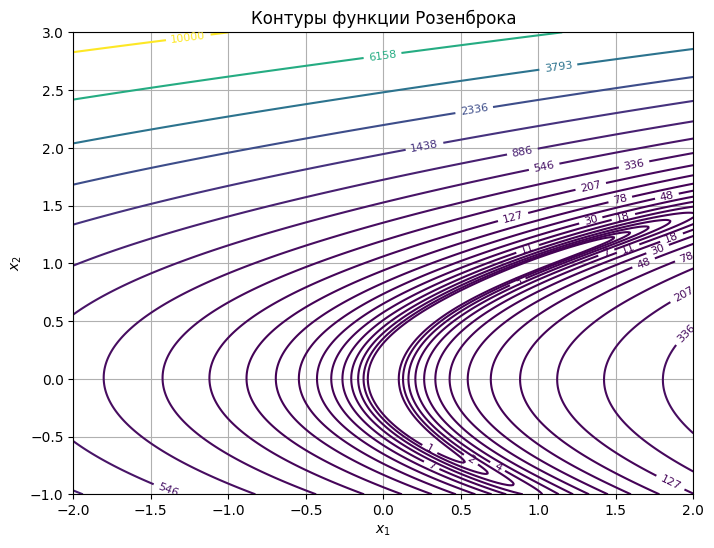

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rosenbrock(x1, x2):
    return 100 * (x1 - x2**2)**2 + (x2 - x1**2)**2

# Создание сетки значений
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = rosenbrock(X1, X2)

# Построение 3D-графика
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('Функция Розенброка: $f(x_1, x_2) = 100(x_1 - x_2^2)^2 + (x_2 - x_1^2)^2$')
plt.show()

# Построение контурного графика
plt.figure(figsize=(8, 6))
contour_plot = plt.contour(X1, X2, Z, levels=np.logspace(0, 4, 20), cmap='viridis')
plt.clabel(contour_plot, inline=True, fontsize=8)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Контуры функции Розенброка')
plt.grid(True)
plt.show()

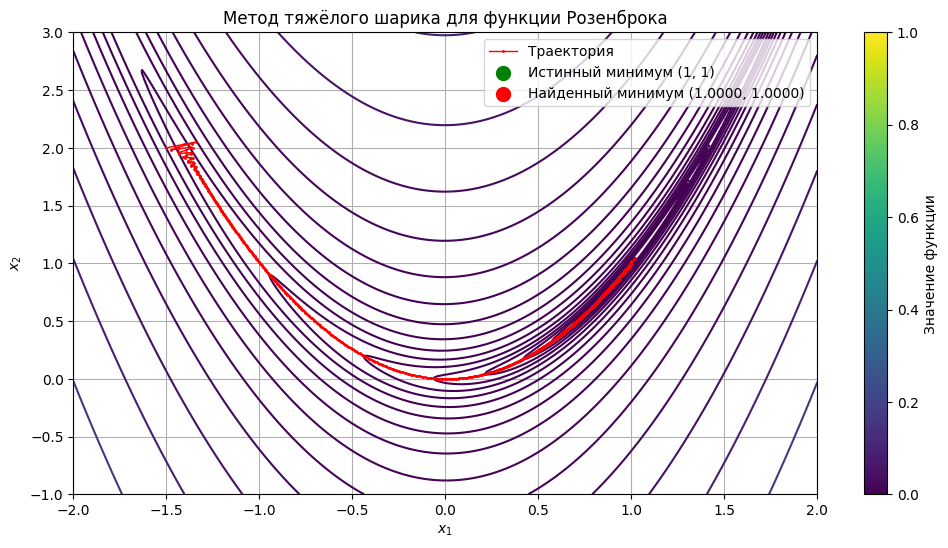

Найденный минимум: (0.99999999, 0.99999998)
Значение функции: 0.00000000
Число итераций: 10939
Норма градиента: 0.00000001


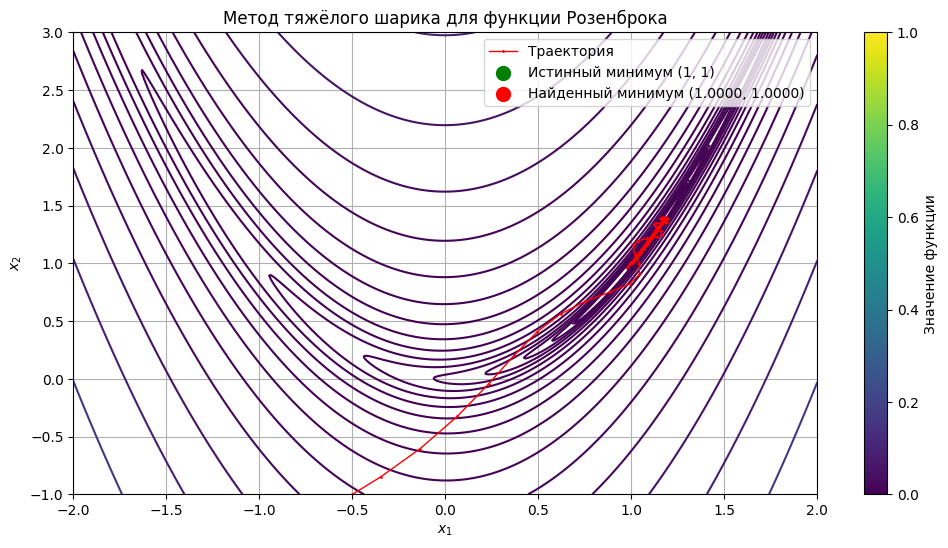

Найденный минимум: (1.00000001, 1.00000002)
Значение функции: 0.00000000
Число итераций: 10529
Норма градиента: 0.00000001


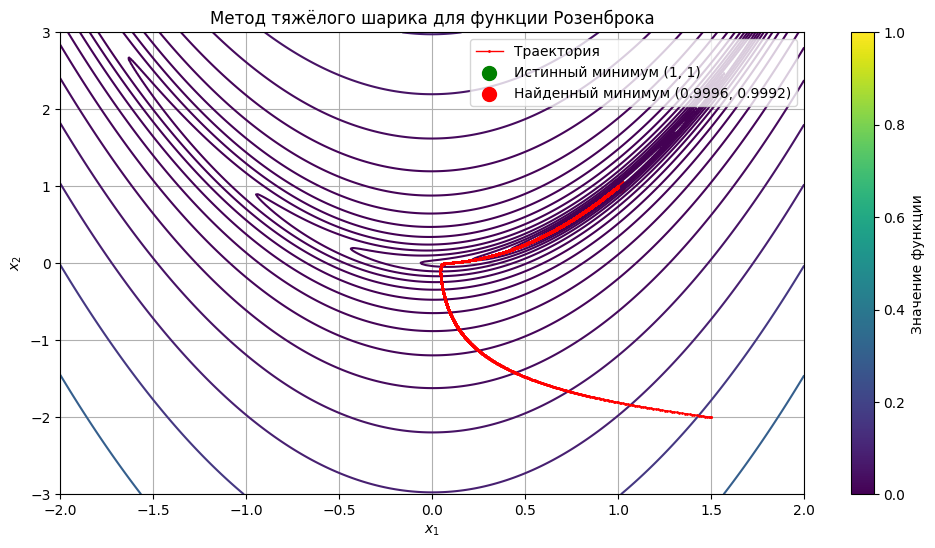

Найденный минимум: (0.99961264, 0.99922389)
Значение функции: 0.00000015
Число итераций: 2500000
Норма градиента: 0.00034657


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x):
    """Функция Розенброка с правильной формулой."""
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def rosenbrock_gradient(x):
    """Точный градиент функции Розенброка."""
    return np.array([
        -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]),
        200 * (x[1] - x[0]**2)
    ])

def heavy_ball_method(f, grad, x0, alpha=1e-3, beta=0.9, max_iter=2500000, epsilon=1e-8):
    """Реализация метода тяжёлого шарика с защитой от расходимости."""
    x = np.array(x0, dtype=float)
    v = np.zeros_like(x)
    trajectory = [x.copy()]
    
    for k in range(max_iter):
        try:
            gradient = grad(x)
            if np.any(np.isnan(gradient)) or np.any(np.isinf(gradient)):
                raise RuntimeError("Градиент содержит NaN или Inf")
            
            v = beta * v - alpha * gradient
            x_new = x + v
            
            # Защита от выхода за разумные пределы
            if np.any(np.abs(x_new) > 1e10):
                raise RuntimeError("Метод расходится")
                
            x = x_new
            trajectory.append(x.copy())
            
            if np.linalg.norm(gradient) < epsilon:
                break
                
        except RuntimeError as e:
            print(f"Остановка на итерации {k}: {str(e)}")
            break
    
    return x, np.array(trajectory)

# Параметры
x0 = [-1.5, 2.0] 
alpha = 6e-4 
beta = 0.85 

# Запуск метода
x_opt, trajectory = heavy_ball_method(rosenbrock, rosenbrock_gradient, x0, alpha, beta)

# Визуализация
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([rosenbrock([x, y]) for x, y in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

plt.figure(figsize=(12, 6))
plt.contour(X1, X2, Z, levels=np.logspace(-1, 4, 20), cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', linewidth=1, markersize=2, label='Траектория')
plt.scatter(1, 1, c='green', s=100, label='Истинный минимум (1, 1)')
plt.scatter(x_opt[0], x_opt[1], c='red', s=100, label=f'Найденный минимум ({x_opt[0]:.4f}, {x_opt[1]:.4f})')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Метод тяжёлого шарика для функции Розенброка')
plt.legend()
plt.colorbar(label='Значение функции')
plt.grid(True)
plt.show()

print(f"Найденный минимум: ({x_opt[0]:.8f}, {x_opt[1]:.8f})")
print(f"Значение функции: {rosenbrock(x_opt):.8f}")
print(f"Число итераций: {len(trajectory) - 1}")
print(f"Норма градиента: {np.linalg.norm(rosenbrock_gradient(x_opt)):.8f}")

# Параметры
x0 = [-0.5, -1.0] 
alpha = 6e-4 
beta = 0.85 

# Запуск метода
x_opt, trajectory = heavy_ball_method(rosenbrock, rosenbrock_gradient, x0, alpha, beta)

# Визуализация
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([rosenbrock([x, y]) for x, y in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

plt.figure(figsize=(12, 6))
plt.contour(X1, X2, Z, levels=np.logspace(-1, 4, 20), cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', linewidth=1, markersize=2, label='Траектория')
plt.scatter(1, 1, c='green', s=100, label='Истинный минимум (1, 1)')
plt.scatter(x_opt[0], x_opt[1], c='red', s=100, label=f'Найденный минимум ({x_opt[0]:.4f}, {x_opt[1]:.4f})')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Метод тяжёлого шарика для функции Розенброка')
plt.legend()
plt.colorbar(label='Значение функции')
plt.grid(True)
plt.show()

print(f"Найденный минимум: ({x_opt[0]:.8f}, {x_opt[1]:.8f})")
print(f"Значение функции: {rosenbrock(x_opt):.8f}")
print(f"Число итераций: {len(trajectory) - 1}")
print(f"Норма градиента: {np.linalg.norm(rosenbrock_gradient(x_opt)):.8f}")

# Параметры
x0 = [1.5, -2.0] 
alpha = 1e-6
beta = 0.85 

# Запуск метода
x_opt, trajectory = heavy_ball_method(rosenbrock, rosenbrock_gradient, x0, alpha, beta)

# Визуализация
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-3, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([rosenbrock([x, y]) for x, y in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

plt.figure(figsize=(12, 6))
plt.contour(X1, X2, Z, levels=np.logspace(-1, 4, 20), cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', linewidth=1, markersize=2, label='Траектория')
plt.scatter(1, 1, c='green', s=100, label='Истинный минимум (1, 1)')
plt.scatter(x_opt[0], x_opt[1], c='red', s=100, label=f'Найденный минимум ({x_opt[0]:.4f}, {x_opt[1]:.4f})')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Метод тяжёлого шарика для функции Розенброка')
plt.legend()
plt.colorbar(label='Значение функции')
plt.grid(True)
plt.show()

print(f"Найденный минимум: ({x_opt[0]:.8f}, {x_opt[1]:.8f})")
print(f"Значение функции: {rosenbrock(x_opt):.8f}")
print(f"Число итераций: {len(trajectory) - 1}")
print(f"Норма градиента: {np.linalg.norm(rosenbrock_gradient(x_opt)):.8f}")

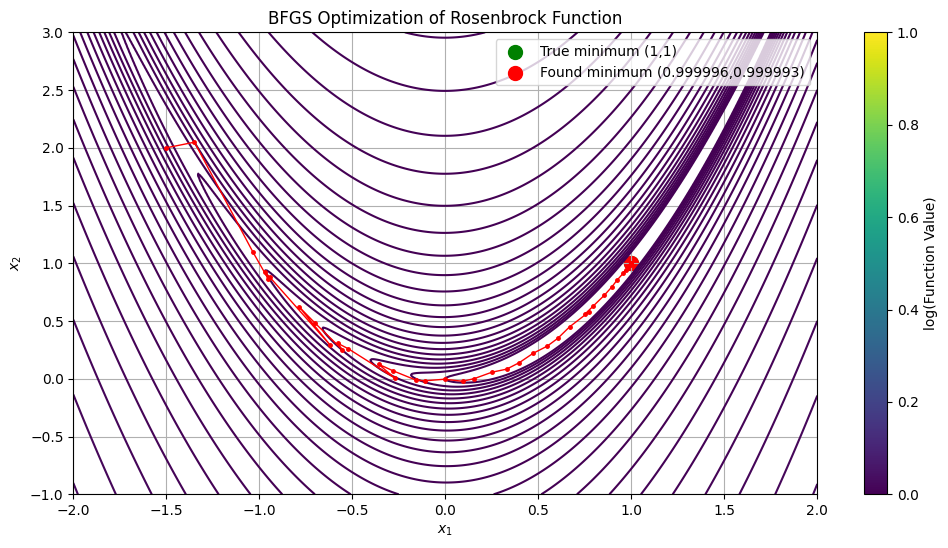

Optimization results:
minimum: (0.999996486453, 0.999992783627)
Function znachenie: 0.000000000016
Gradient norm: 0.000078431181
Iter: 40


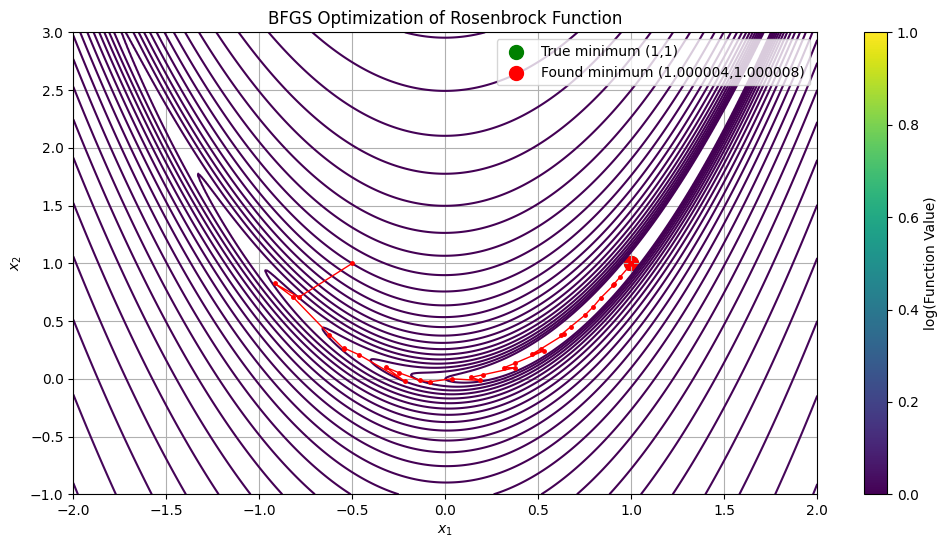

Optimization results:
minimum: (1.000003946856, 1.000007677770)
Function znachenie: 0.000000000020
Gradient norm: 0.000103699783
Iter: 37


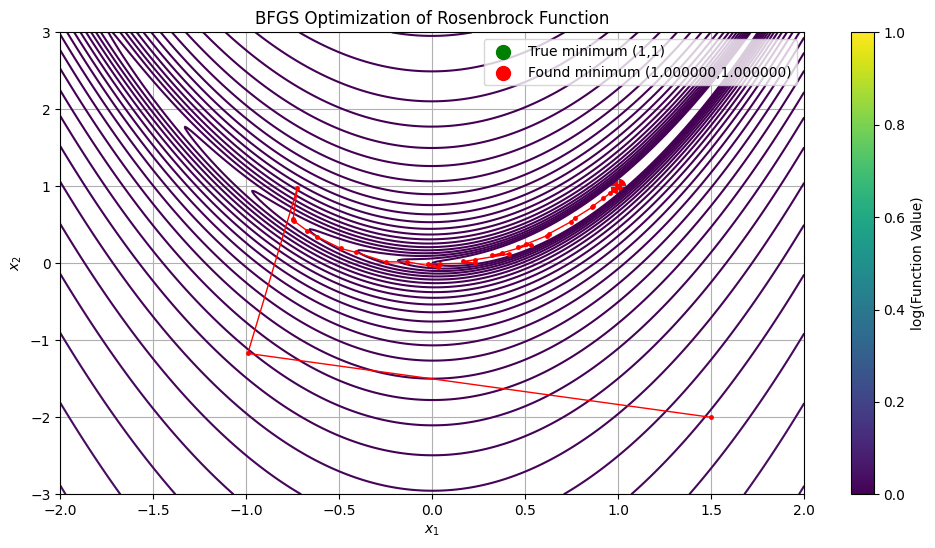

Optimization results:
minimum: (1.000000223575, 1.000000430639)
Function znachenie: 0.000000000000
Gradient norm: 0.000007786551
Iter: 38


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x):
    """Функция Розенброка"""
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def rosenbrock_gradient(x):
    """Аналитический градиент функции Розенброка"""
    return np.array([
        -400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0]),
        200*(x[1] - x[0]**2)
    ])

def bfgs(f, grad, x0, max_iter=1000, tol=1e-8):
    """Реализация метода BFGS без использования встроенных оптимизаторов"""
    n = len(x0)
    H = np.eye(n)  # Начальная аппроксимация обратного Гессе
    x = x0.copy()
    trajectory = [x.copy()]
    g = grad(x)
    
    for k in range(max_iter):
        # Критерий остановки
        if np.linalg.norm(g) < tol:
            break
        
        # Направление спуска
        p = -H.dot(g)
        
        # Линейный поиск (метод обратной параболы)
        alpha = 1.0
        c1, c2 = 1e-4, 0.9  # Параметры условий Вольфе
        for ls_iter in range(100):
            x_new = x + alpha*p
            f_new = f(x_new)
            g_new = grad(x_new)
            
            # Проверка условий Вольфе
            if f_new > f(x) + c1*alpha*np.dot(g, p):
                alpha *= 0.5
            elif np.dot(g_new, p) < c2*np.dot(g, p):
                alpha *= 1.5
            else:
                break
        
        # Обновление переменных
        s = alpha * p
        x_new = x + s
        g_new = grad(x_new)
        y = g_new - g
        
        # Пропуск плохих обновлений
        sy = np.dot(s, y)
        if sy <= 1e-10:
            continue
            
        # Обновление матрицы BFGS
        rho = 1.0 / sy
        I = np.eye(n)
        A = I - rho * np.outer(s, y)
        H = A.dot(H).dot(A.T) + rho * np.outer(s, s)
        
        # Сохранение новых значений
        x = x_new
        g = g_new
        trajectory.append(x.copy())
    
    return x, np.array(trajectory)

# Параметры оптимизации ч1
x0 = np.array([-1.5, 2.0])
x_opt, trajectory = bfgs(rosenbrock, rosenbrock_gradient, x0)

# Визуализация
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([rosenbrock([x,y]) for x,y in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

plt.figure(figsize=(12,6))
plt.contour(X1, X2, Z, levels=np.logspace(0,5,35), cmap='viridis')
plt.plot(trajectory[:,0], trajectory[:,1], 'r.-', markersize=5, linewidth=1)
plt.scatter(1, 1, c='green', s=100, label='True minimum (1,1)')
plt.scatter(x_opt[0], x_opt[1], c='red', s=100, label=f'Found minimum ({x_opt[0]:.6f},{x_opt[1]:.6f})')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('BFGS Optimization of Rosenbrock Function')
plt.legend()
plt.colorbar(label='log(Function Value)')
plt.grid(True)
plt.show()

print("Optimization results:")
print(f"minimum: ({x_opt[0]:.12f}, {x_opt[1]:.12f})")
print(f"Function znachenie: {rosenbrock(x_opt):.12f}")
print(f"Gradient norm: {np.linalg.norm(rosenbrock_gradient(x_opt)):.12f}")
print(f"Iter: {len(trajectory)-1}")
# Параметры оптимизации ч2
x0 = np.array([-0.5, 1.0])
x_opt, trajectory = bfgs(rosenbrock, rosenbrock_gradient, x0)

# Визуализация
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([rosenbrock([x,y]) for x,y in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

plt.figure(figsize=(12,6))
plt.contour(X1, X2, Z, levels=np.logspace(0,5,35), cmap='viridis')
plt.plot(trajectory[:,0], trajectory[:,1], 'r.-', markersize=5, linewidth=1)
plt.scatter(1, 1, c='green', s=100, label='True minimum (1,1)')
plt.scatter(x_opt[0], x_opt[1], c='red', s=100, label=f'Found minimum ({x_opt[0]:.6f},{x_opt[1]:.6f})')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('BFGS Optimization of Rosenbrock Function')
plt.legend()
plt.colorbar(label='log(Function Value)')
plt.grid(True)
plt.show()

print("Optimization results:")
print(f"minimum: ({x_opt[0]:.12f}, {x_opt[1]:.12f})")
print(f"Function znachenie: {rosenbrock(x_opt):.12f}")
print(f"Gradient norm: {np.linalg.norm(rosenbrock_gradient(x_opt)):.12f}")
print(f"Iter: {len(trajectory)-1}")
# Параметры оптимизации ч3
x0 = np.array([1.5, -2.0])
x_opt, trajectory = bfgs(rosenbrock, rosenbrock_gradient, x0)

# Визуализация
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-3, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([rosenbrock([x,y]) for x,y in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

plt.figure(figsize=(12,6))
plt.contour(X1, X2, Z, levels=np.logspace(0,5,35), cmap='viridis')
plt.plot(trajectory[:,0], trajectory[:,1], 'r.-', markersize=5, linewidth=1)
plt.scatter(1, 1, c='green', s=100, label='True minimum (1,1)')
plt.scatter(x_opt[0], x_opt[1], c='red', s=100, label=f'Found minimum ({x_opt[0]:.6f},{x_opt[1]:.6f})')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('BFGS Optimization of Rosenbrock Function')
plt.legend()
plt.colorbar(label='log(Function Value)')
plt.grid(True)
plt.show()

print("Optimization results:")
print(f"minimum: ({x_opt[0]:.12f}, {x_opt[1]:.12f})")
print(f"Function znachenie: {rosenbrock(x_opt):.12f}")
print(f"Gradient norm: {np.linalg.norm(rosenbrock_gradient(x_opt)):.12f}")
print(f"Iter: {len(trajectory)-1}")

In [3]:
import numpy as np

def f(x): return 5 * x**2 * np.exp(-x / 2)

def brent(f, a, c, tol=1e-3, max_iter=100):
    g = lambda x: -f(x)
    t = (3 - np.sqrt(5)) / 2
    x = w = v = a + t * (c - a)
    fx = fw = fv = g(x)
    d = e = c - a

    for _ in range(max_iter):
        m = 0.5 * (a + c)
        tol1 = tol * abs(x) + 1e-10
        if abs(x - m) <= 2 * tol1 - 0.5 * (c - a): break

        p = q = r = 0
        if abs(e) > tol1:
            r, q = (x - w) * (fx - fv), (x - v) * (fx - fw)
            p, q = (x - v) * q - (x - w) * r, 2 * (q - r)
            if q != 0:
                p *= -1 if q > 0 else 1
                if abs(p) < abs(0.5 * q * e) and a < (u := x + p / q) < c:
                    d = p / q
                else:
                    d = t * (e := c - a if x < m else a - c)
            else:
                d = t * (e := c - a if x < m else a - c)
        else:
            d = t * (e := c - a if x < m else a - c)
        u = x + d
        fu = g(u)

        if fu <= fx:
            if u < x: c = x
            else: a = x
            v, fv, w, fw, x, fx = w, fw, x, fx, u, fu
        else:
            if u < x: a = u
            else: c = u
            if fu <= fw or w == x: v, fv, w, fw = w, fw, u, fu
            elif fu <= fv or v in [x, w]: v, fv = u, fu

    return x, f(x)

# Параметры и запуск
x_max, f_max = brent(f, 2, 6, tol=0.002)
print(f"Максимум: x = {x_max:.5f}, f(x) = {f_max:.5f}")

Максимум: x = 3.99999, f(x) = 10.82682


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x - 2 * np.log(x)

def brent(f, a, c, tol=1e-3, max_iter=100):
    φ = (3 - np.sqrt(5)) / 2
    x = w = v = a + φ * (c - a)
    fx = fw = fv = f(x)
    d = e = c - a

    for _ in range(max_iter):
        m = 0.5 * (a + c)
        tol1 = tol * abs(x) + 1e-10
        if abs(x - m) <= 2 * tol1 - 0.5 * (c - a): break

        p = q = r = 0
        if abs(e) > tol1:
            r, q = (x - w) * (fx - fv), (x - v) * (fx - fw)
            p, q = (x - v) * q - (x - w) * r, 2 * (q - r)
            if q != 0:
                p *= -1 if q > 0 else 1
                if abs(p) < abs(0.5 * q * e) and a < (u := x + p / q) < c:
                    d = p / q
                else:
                    d = φ * (e := c - a if x < m else a - c)
            else:
                d = φ * (e := c - a if x < m else a - c)
        else:
            d = φ * (e := c - a if x < m else a - c)
        u = x + d
        if u <= 0: u = tol  # защита от log(<=0)
        fu = f(u)

        if fu <= fx:
            if u < x: c = x
            else: a = x
            v, fv, w, fw, x, fx = w, fw, x, fx, u, fu
        else:
            if u < x: a = u
            else: c = u
            if fu <= fw or w == x: v, fv, w, fw = w, fw, u, fu
            elif fu <= fv or v in [x, w]: v, fv = u, fu

    return x, f(x)

# Интервал и погрешность
x_min, f_min = brent(f, 0.5, 5, tol=0.002)
print(f"Минимум: x = {x_min:.5f}, f(x) = {f_min:.5f}")

Минимум: x = 1.99970, f(x) = 0.61371
